In [429]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [430]:
# Reading the data
data = pd.read_csv("matches.csv", index_col="id")
data.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [431]:
# Checking datatypes 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 1 to 11415
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           756 non-null    int64 
 1   city             749 non-null    object
 2   date             756 non-null    object
 3   team1            756 non-null    object
 4   team2            756 non-null    object
 5   toss_winner      756 non-null    object
 6   toss_decision    756 non-null    object
 7   result           756 non-null    object
 8   dl_applied       756 non-null    int64 
 9   winner           752 non-null    object
 10  win_by_runs      756 non-null    int64 
 11  win_by_wickets   756 non-null    int64 
 12  player_of_match  752 non-null    object
 13  venue            756 non-null    object
 14  umpire1          754 non-null    object
 15  umpire2          754 non-null    object
 16  umpire3          119 non-null    object
dtypes: int64(4), object(13)
memory us

In [432]:
# Checking Statistical Summary
data.describe(include='all')

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,756.000000,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754,119
unique,NaN,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41,61,65,25
top,NaN,Mumbai,2011-04-17,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,C Shamshuddin,Nitin Menon
freq,NaN,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57,10
mean,2013.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN,NaN
std,3.366895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN,NaN
min,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


In [433]:
# Categorical features
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
# Numerical features
num_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Print number of categorical and numerical features
print(f"Number of categorical features: {len(cat_cols)}")
print("Names: ", cat_cols)
print()
print(f"Number of numerical features: {len(num_cols)}")
print("Names: ", num_cols)

Number of categorical features: 13
Names:  ['city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'winner', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3']

Number of numerical features: 4
Names:  ['season', 'dl_applied', 'win_by_runs', 'win_by_wickets']


### 1. Fill in missing values in each feature (if has) by using the mean value of that feature.

In [434]:
# Calulating Null values
data.isna().sum()

season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [435]:
# Since all the variables are categorical which have null values, hence null values are replaced with mode values of each particular column
data.fillna(data.mode().iloc[0], inplace=True)
data.isnull().sum()
data_anova = data.copy()

### 2. Use Box plots to identify which features have outliers and replace these values with the mean value. For a supervised dataset, where the class labels are known, this mean value should be computed using only the values that belong to the same class. On the other hand, for unsupervised datasets where class labels are not available, this mean value should be computed using all the values in the feature.

In [436]:
data["winner"].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [437]:
# Treating outliers by first breaking data set into different class labels (as our dataset is supervised, having target variable "winner").
dataset_0 = data[data["winner"]=='Sunrisers Hyderabad']
dataset_1 = data[data["winner"]=='Rising Pune Supergiant']
dataset_2 = data[data["winner"]=='Kolkata Knight Riders']
dataset_3 = data[data["winner"]=='Kings XI Punjab']
dataset_4 = data[data["winner"]=='Royal Challengers Bangalore']
dataset_5 = data[data["winner"]=='Mumbai Indians']
dataset_6 = data[data["winner"]=='Delhi Daredevils']
dataset_7 = data[data["winner"]=='Gujarat Lions']
dataset_8 = data[data["winner"]=='Chennai Super Kings']
dataset_9 = data[data["winner"]=='Rajasthan Royals']
dataset_10 = data[data["winner"]=='Deccan Chargers']
dataset_11 = data[data["winner"]=='Pune Warriors']
dataset_12 = data[data["winner"]=='Kochi Tuskers Kerala']
dataset_13 = data[data["winner"]=='Rising Pune Supergiants']
dataset_14 = data[data["winner"]=='Delhi Capitals']
datasets = [dataset_0,dataset_1,dataset_2,dataset_3,dataset_4,dataset_5,dataset_6,dataset_7,dataset_8,dataset_9,dataset_10,dataset_11,dataset_12,dataset_13,dataset_14]

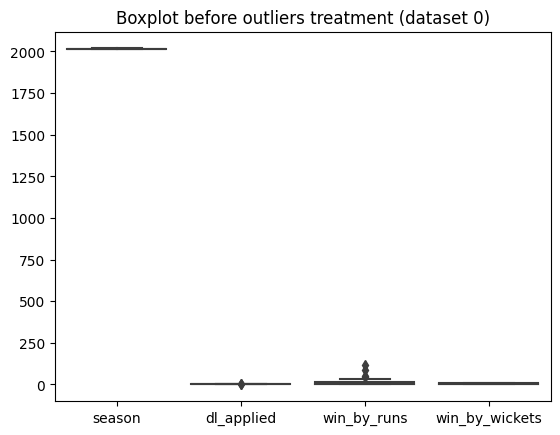

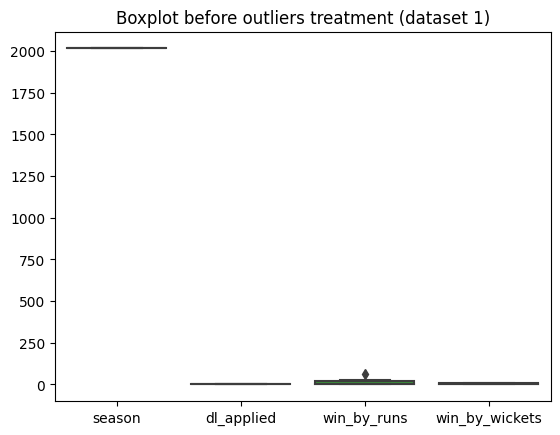

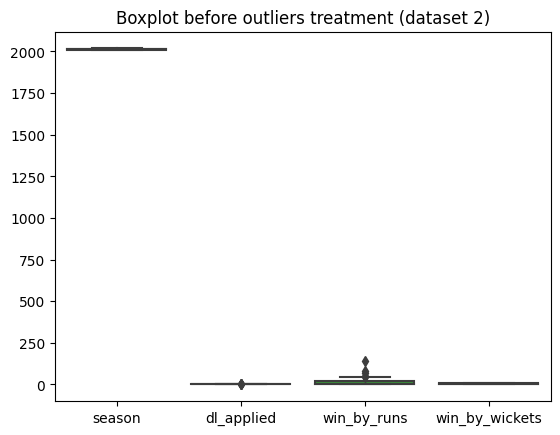

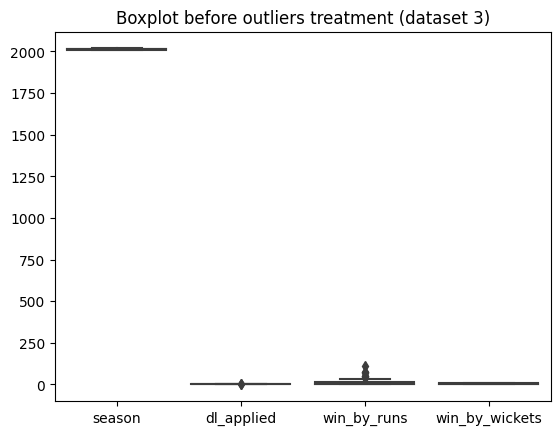

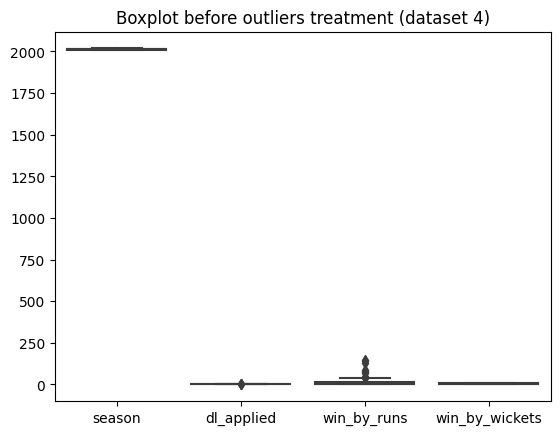

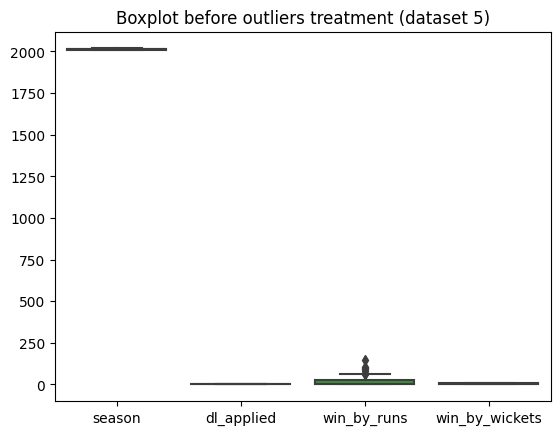

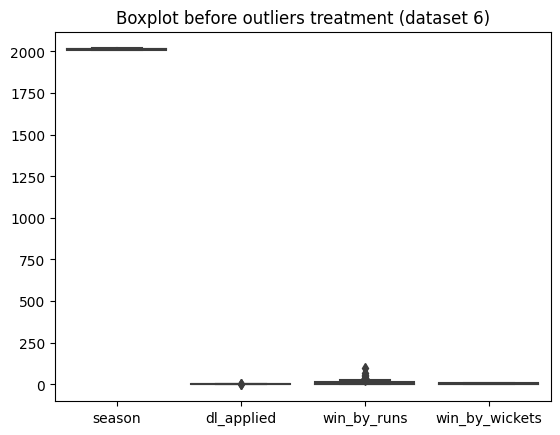

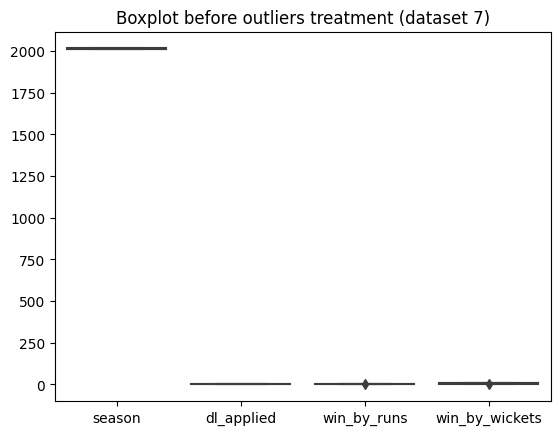

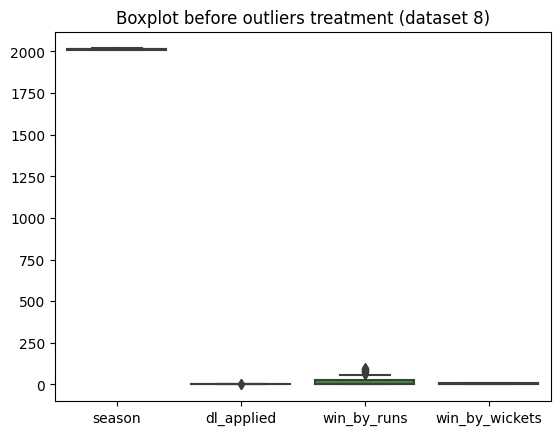

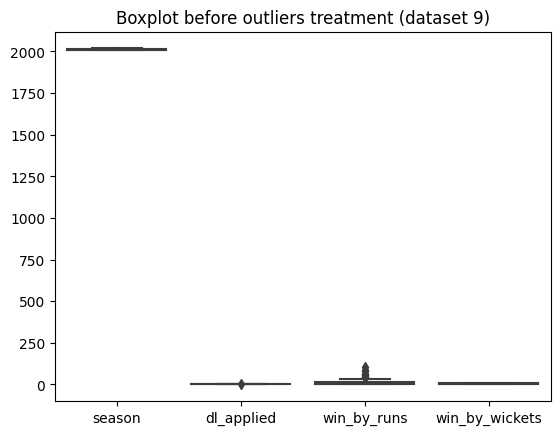

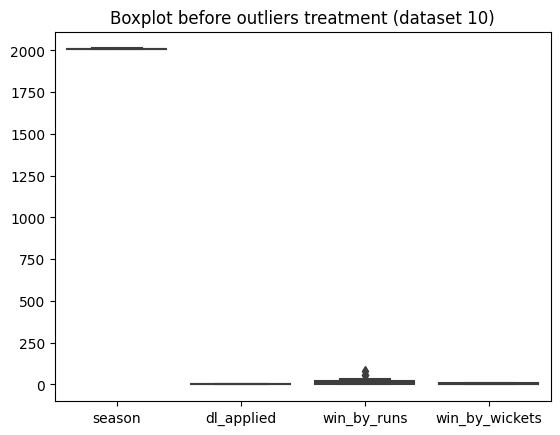

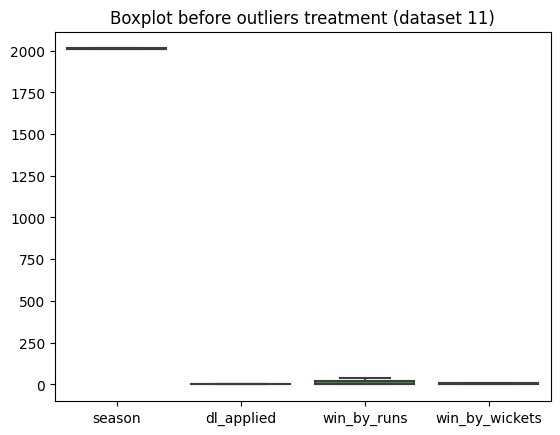

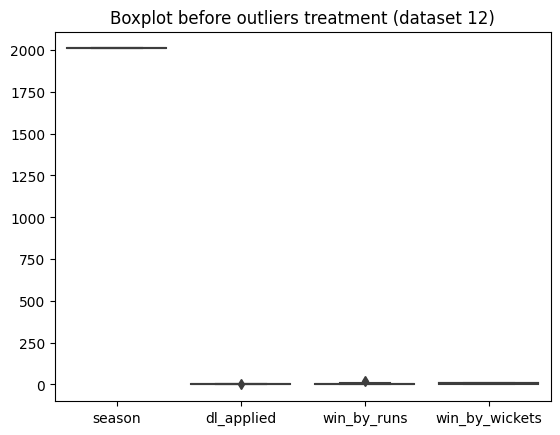

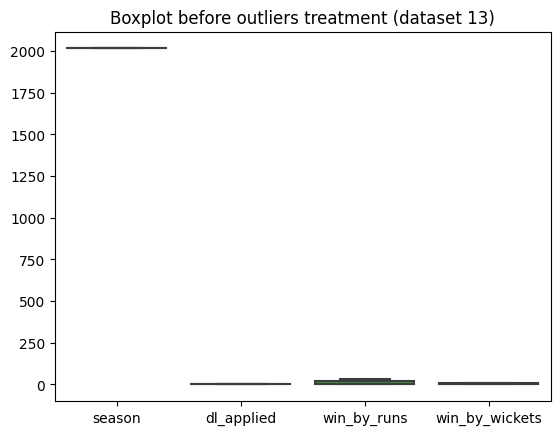

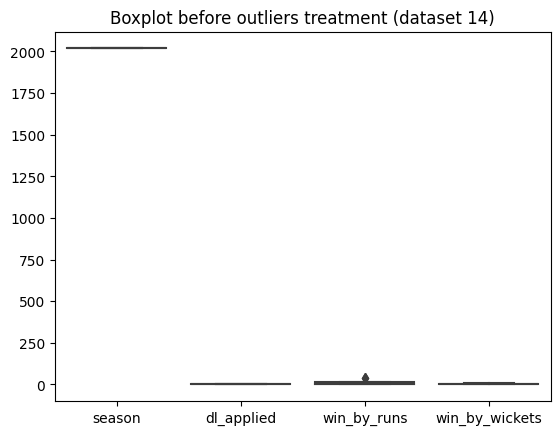

In [438]:
# Plotting Box plot of numerical features of all datasets divided based on class labels
for i in range(len(datasets)):
    sns.boxplot(data=datasets[i])
    plt.title("Boxplot before outliers treatment (dataset {})".format(i))
    plt.show()

In [439]:
# Except Dataset 11 & 13 all have some outliers, they will be treated by firtly calculating them using IQR method and then imputating them with mean values.
def IQR(df_class):
    """Calculating Outliers using IQR and then replacing them with mean values"""
    for col in ['dl_applied', 'win_by_runs', 'win_by_wickets']:      # Since season variable has no outlier in each dataset, hence we will not mention it here.
        q1 = df_class[col].quantile(0.25)   # Calculating 25%
        q3 = df_class[col].quantile(0.75)   # Calculating 75%
        iqr = q3 - q1
        outliers = ((df_class[col] < (q1 - 1.5 * iqr)) | (df_class[col] > (q3 + 1.5 * iqr)))
        df_class.loc[outliers, col] = df_class[col].mean()
        return df_class

# Applying above method to the datasets to replace outliers with mean.
dataset_0 = IQR(dataset_0)
dataset_1 = IQR(dataset_1)
dataset_2 = IQR(dataset_2)
dataset_3 = IQR(dataset_3)
dataset_4 = IQR(dataset_4)
dataset_5 = IQR(dataset_5)
dataset_6 = IQR(dataset_6)
dataset_7 = IQR(dataset_7)
dataset_8 = IQR(dataset_8)
dataset_9 = IQR(dataset_9)
dataset_10 = IQR(dataset_10)
dataset_12 = IQR(dataset_12)
dataset_14 = IQR(dataset_13)
# Concatenating all the datasets
df_clean = pd.concat([dataset_0,dataset_1,dataset_2,dataset_3,dataset_4,dataset_5,dataset_6,dataset_7,dataset_8,dataset_9,dataset_10,dataset_11,dataset_12,dataset_13,dataset_14])
df_clean.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,C Shamshuddin
6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0.0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,C Shamshuddin
19,2017,Hyderabad,2017-04-17,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0.0,Sunrisers Hyderabad,5,0,B Kumar,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,A Deshmukh,C Shamshuddin
21,2017,Hyderabad,2017-04-19,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0.0,Sunrisers Hyderabad,15,0,KS Williamson,"Rajiv Gandhi International Stadium, Uppal",CB Gaffaney,NJ Llong,C Shamshuddin
32,2017,Chandigarh,2017-04-28,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0.0,Sunrisers Hyderabad,26,0,Rashid Khan,"Punjab Cricket Association IS Bindra Stadium, ...",Nitin Menon,CK Nandan,C Shamshuddin


### 3. Use LabelEncoder to for the features which have categorical data to convert it into numerical data.

In [440]:
# Label encoder
le = LabelEncoder()
for i in cat_cols:
    df_clean[i]=le.fit_transform(df_clean[i])
df_clean.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,14,468,14,13,13,1,1,0.0,13,35,0,221,28,6,33,5
6,2017,14,472,4,14,14,1,1,0.0,13,0,9,170,28,0,33,5
19,2017,14,480,14,5,5,1,1,0.0,13,5,0,25,28,6,0,5
21,2017,14,482,14,3,14,0,1,0.0,13,15,0,100,28,17,33,5
32,2017,7,490,14,5,5,1,1,0.0,13,26,0,170,26,38,16,5


### 4. Apply Min-Max Normalization on the each feature to scale the values in the range [0, 1].

In [441]:
# Min-Max Scaler
scaler = MinMaxScaler()
# Apply Min-Max normalization to each column
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)
df_scaled1 = df_scaled.copy()
df_scaled.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,0.818182,0.451613,0.863469,1.000000,0.928571,0.928571,1.0,0.5,0.0,1.0,0.239726,0.0,0.995495,0.70,0.101695,0.523810,0.208333
1,0.818182,0.451613,0.870849,0.285714,1.000000,1.000000,1.0,0.5,0.0,1.0,0.000000,0.9,0.765766,0.70,0.000000,0.523810,0.208333
2,0.818182,0.451613,0.885609,1.000000,0.357143,0.357143,1.0,0.5,0.0,1.0,0.034247,0.0,0.112613,0.70,0.101695,0.000000,0.208333
3,0.818182,0.451613,0.889299,1.000000,0.214286,1.000000,0.0,0.5,0.0,1.0,0.102740,0.0,0.450450,0.70,0.288136,0.523810,0.208333
4,0.818182,0.225806,0.904059,1.000000,0.357143,0.357143,1.0,0.5,0.0,1.0,0.178082,0.0,0.765766,0.65,0.644068,0.253968,0.208333


### 5. Analyze the dataset as its in long (tidy) or wide format. If it is already in long format, then convert it (by selecting 2 or more variables) to wide and visa-versa.

In [442]:
# Our dataset is in long format, hence converting the DataFrame to wide format
df_scaled1.reset_index(inplace=True)
wide_df = df_scaled1.pivot(index = "index", columns=['team1', 'team2'], values=['season', 'city', 'toss_winner'])
wide_df

season                                                           \
team1  1.000000  0.285714  1.000000                    0.571429 1.000000   
team2  0.928571  1.000000  0.357143  0.214286 0.500000 1.000000 0.642857   
index                                                                      
0      0.818182       NaN       NaN       NaN      NaN      NaN      NaN   
1           NaN  0.818182       NaN       NaN      NaN      NaN      NaN   
2           NaN       NaN  0.818182       NaN      NaN      NaN      NaN   
3           NaN       NaN       NaN  0.818182      NaN      NaN      NaN   
4           NaN       NaN  0.818182       NaN      NaN      NaN      NaN   
...         ...       ...       ...       ...      ...      ...      ...   
746         NaN       NaN       NaN       NaN      NaN      NaN      NaN   
747         NaN       NaN       NaN       NaN      NaN      NaN      NaN   
748         NaN       NaN       NaN       NaN      NaN      NaN      NaN   
749         NaN       NaN       NaN       NaN      NaN      NaN      NaN   
750         NaN       NaN       NaN       NaN      NaN      NaN      NaN   

                                  ... toss_winner                             \
team1 0.928571 0.214286 0.357143  ...    0.642857 0.071429 0.357143 0.428571   
team2 1.000000 1.000000 1.000000  ...    0.071429 0.642857 0.642857 0.642857   
index                             ...                                          
0          NaN      NaN      NaN  ...         NaN      NaN      NaN      NaN   
1          NaN      NaN      NaN  ...         NaN      NaN      NaN      NaN   
2          NaN      NaN      NaN  ...         NaN      NaN      NaN      NaN   
3          NaN      NaN      NaN  ...         NaN      NaN      NaN      NaN   
4          NaN      NaN      NaN  ...         NaN      NaN      NaN      NaN   
...        ...      ...      ...  ...         ...      ...      ...      ...   
746        NaN      NaN      NaN  ...         NaN      NaN      NaN      NaN   
747        NaN      NaN      NaN  ...         NaN      NaN      NaN      NaN   
748        NaN      NaN      NaN  ...         NaN      NaN      NaN      NaN   
749        NaN      NaN      NaN  ...         NaN      NaN      NaN      NaN   
750        NaN      NaN      NaN  ...         NaN      NaN      NaN      NaN   

                                                                
team1 0.571429 0.428571 0.714286  0.571429  0.214286  0.357143  
team2 0.428571 0.500000 0.428571  0.857143  0.857143  0.857143  
index                                                           
0          NaN      NaN      NaN       NaN       NaN       NaN  
1          NaN      NaN      NaN       NaN       NaN       NaN  
2          NaN      NaN      NaN       NaN       NaN       NaN  
3          NaN      NaN      NaN       NaN       NaN       NaN  
4          NaN      NaN      NaN       NaN       NaN       NaN  
...        ...      ...      ...       ...       ...       ...  
746        NaN      NaN      NaN  0.571429       NaN       NaN  
747        NaN      NaN      NaN       NaN       NaN       NaN  
748        NaN      NaN      NaN       NaN  0.857143       NaN  
749        NaN      NaN      NaN       NaN  0.857143       NaN  
750        NaN      NaN      NaN       NaN       NaN  0.357143  

[751 rows x 399 columns]

### 7. For supervised dataset (if you selected), implement ANOVA method to identify irrelevant features without using any libraries to compute the F-statistics. Utilize a bar chat to visualize the computed F- statistics and provide a list of the identified irrelevant features.

Irrelevant features: ['season', 'city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3']


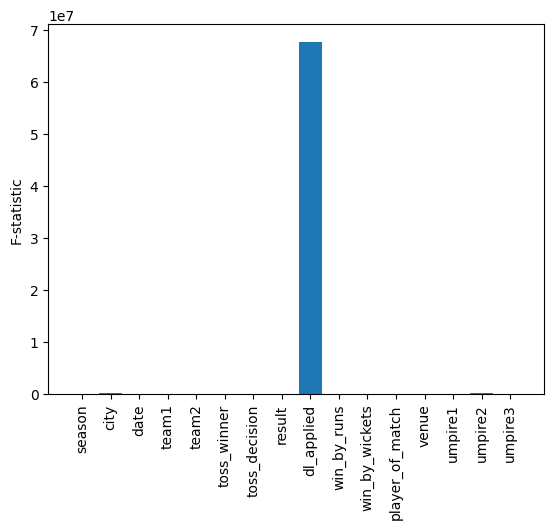

In [443]:
# Splitting the dataset into features and target variable
X = df_scaled.drop(['winner'], axis=1)
y = df_scaled['winner']
# Calculating the mean of each feature for each class
class_means = X.groupby(y).mean()
# Calculating the total mean for each feature
total_means = X.mean()
# Calculating the between-class sum of squares
S_B = ((class_means - total_means) ** 2).sum() * len(X)
# Calculating the within-class sum of squares
S_W = ((X - class_means.loc[y]) ** 2).sum()
# Calculating the F-statistic for each feature
F = (S_B / (len(np.unique(y)) - 1)) / (S_W / (len(X) - len(np.unique(y))))
# Identifying the irrelevant features
irrelevant_features = list(X.columns[F < np.mean(F)])
print("Irrelevant features:", irrelevant_features)
# Plotting the F-statistics for each feature
plt.bar(range(len(X.columns)), F)
plt.xticks(range(len(X.columns)), X.columns, rotation='vertical')
plt.ylabel('F-statistic')
plt.show()